# Spotify Recommendation Systems

## A. Business Understanding
Spotify merupakan salah satu platform streaming musik terbesar di dunia dengan jutaan pengguna aktif. Agar tetap kompetitif dan meningkatkan pengalaman pengguna, Spotify harus memberikan rekomendasi musik yang relevan dan personal. Sistem rekomendasi yang efektif membantu menjaga pengguna tetap terlibat dengan aplikasi, memperpanjang waktu mendengarkan musik, dan mendorong mereka untuk mengeksplorasi konten baru.

Spotify menghadapi tantangan dalam menyaring jumlah besar data yang berasal dari jutaan lagu, artis, dan preferensi pengguna. Sistem rekomendasi saat ini mungkin kurang optimal dalam menyesuaikan preferensi musik yang selalu berubah. Kegagalan untuk memberikan rekomendasi yang tepat dapat mengakibatkan pengguna tidak puas, meninggalkan platform, atau tidak terlibat sebanyak mungkin. Oleh karena itu, pengembangan sistem rekomendasi yang lebih baik dan lebih akurat sangat dibutuhkan.

## B. Data Understanding
Mengatur dan menghubungkan Kaggle dengan Google Colaboratory. Langkah ini bertujuan untuk mengunduh dataset yang tersedia di Kaggle agar bisa digunakan dalam pengembangan model di Colaboratory.

### Connect to Kaggle

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# kaggle API Token
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/PYTHON/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [75]:
# API Command from Anemia Dataset
!kaggle datasets download -d paradisejoy/top-hits-spotify-from-20002019

Dataset URL: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019
License(s): other
top-hits-spotify-from-20002019.zip: Skipping, found more recently modified local copy (use --force to force download)


In [76]:
# Unzipping Datasets
!unzip -o /content/top-hits-spotify-from-20002019.zip -d /content/drive/MyDrive/PYTHON/Dataset

Archive:  /content/top-hits-spotify-from-20002019.zip
  inflating: /content/drive/MyDrive/PYTHON/Dataset/songs_normalize.csv  


### Data Loading

In [77]:
# libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [78]:
# read_csv
df = pd.read_csv('/content/drive/MyDrive/PYTHON/Dataset/songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Data Cleaning

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [80]:
# check missing values
(df.isnull() | df.empty | df.isna()).sum()

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


In [81]:
df.duplicated().sum()

59

In [82]:
# remove the duplicates data
df.drop_duplicates(inplace=True)
if df.duplicated().sum() == 0:
  print('No Duplicates')

No Duplicates


In [83]:
# check dimensinality
df.shape

(1941, 18)

In [84]:
# check the decriptive statistics
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
artist,1941,835,Rihanna,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song,1941,1879,Sorry,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,1941.0,NaN,NaN,NaN,228594.973725,39249.796103,113000.0,203506.0,223186.0,247946.0,484146.0
explicit,1941,2,False,1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1941.0,NaN,NaN,NaN,2009.52035,5.875532,1998.0,2004.0,2010.0,2015.0,2020.0
popularity,1941.0,NaN,NaN,NaN,59.633179,21.501053,0.0,56.0,65.0,73.0,89.0
danceability,1941.0,NaN,NaN,NaN,0.667814,0.140608,0.129,0.581,0.676,0.765,0.975
energy,1941.0,NaN,NaN,NaN,0.721549,0.152872,0.0549,0.624,0.739,0.84,0.999
key,1941.0,NaN,NaN,NaN,5.369397,3.61527,0.0,2.0,6.0,8.0,11.0
loudness,1941.0,NaN,NaN,NaN,-5.514082,1.93895,-20.514,-6.49,-5.285,-4.168,-0.276


Dataset ini terdiri dari berbagai kolom, seperti artist, song, duration_ms, explicit, year, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, dan genre. Kolom artist dan song menampilkan nama artis serta judul lagu, di mana artis yang paling sering muncul adalah Drake (23 kali) dan lagu yang paling sering muncul adalah "Sorry" (4 kali). Kolom explicit menunjukkan apakah lagu mengandung konten eksplisit, dengan mayoritas (1404 entri) tidak eksplisit. Genre paling dominan adalah "pop" dengan 416 lagu.

Setelah itu, fungsi `describe()` digunakan untuk memberikan ringkasan statistik yang mencakup informasi terkait tendensi sentral, distribusi, serta jangkauan data dalam dataset. Pada beberapa kolom, seperti mean, std, dan min, terdapat nilai NaN (Not a Number), terutama untuk kolom artist, song, dan explicit. Hal ini disebabkan karena kolom-kolom tersebut berisi data object, bukan data numerik. Nilai NaN muncul karena fungsi deskriptif seperti mean, standar deviasi, dan lainnya tidak relevan untuk data non-numerik. Oleh karena itu, statistik seperti rata-rata dan deviasi standar tidak dapat dihitung untuk kolom yang berisi teks atau boolean. Sehingga perlu dikonversi ke tipe data kategorikal guna memfasilitasi proses Exploratory Data Analysis (EDA).

## C. Eploratory Data Analysis (EDA)
Analisis data eksploratif (Exploratory Data Analysis/EDA) adalah proses awal yang penting untuk memahami dataset, menganalisis karakteristiknya, menemukan pola, mendeteksi anomali, dan memeriksa asumsi data dengan memanfaatkan metode statistik serta visualisasi grafis. Pada tahap pembersihan data sebelumnya, sebenarnya sudah dilakukan proses EDA dengan menggali informasi terkait dataset, atribut, kelas, jumlah instance, dan statistik deskriptif.

Di sini, eksplorasi lanjutan akan dilakukan untuk menganalisis lebih dalam dan mengetahui wawasan (*insight*) yang dapat diperoleh dari dataset ini. Sebelumnya, akan dilakukan konversi data numerik menjadi kategorikal.

### Univariate Analysis

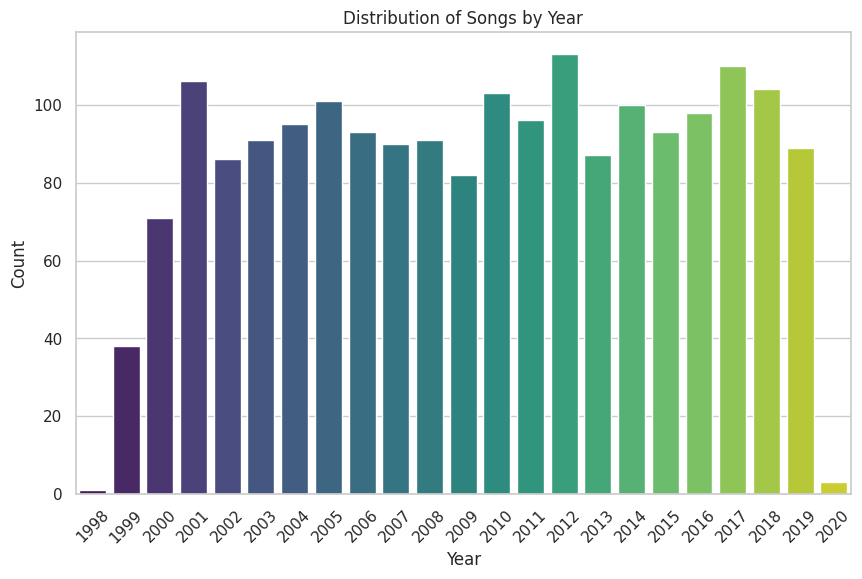

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Songs by Year')
plt.xticks(rotation=45)
plt.show()

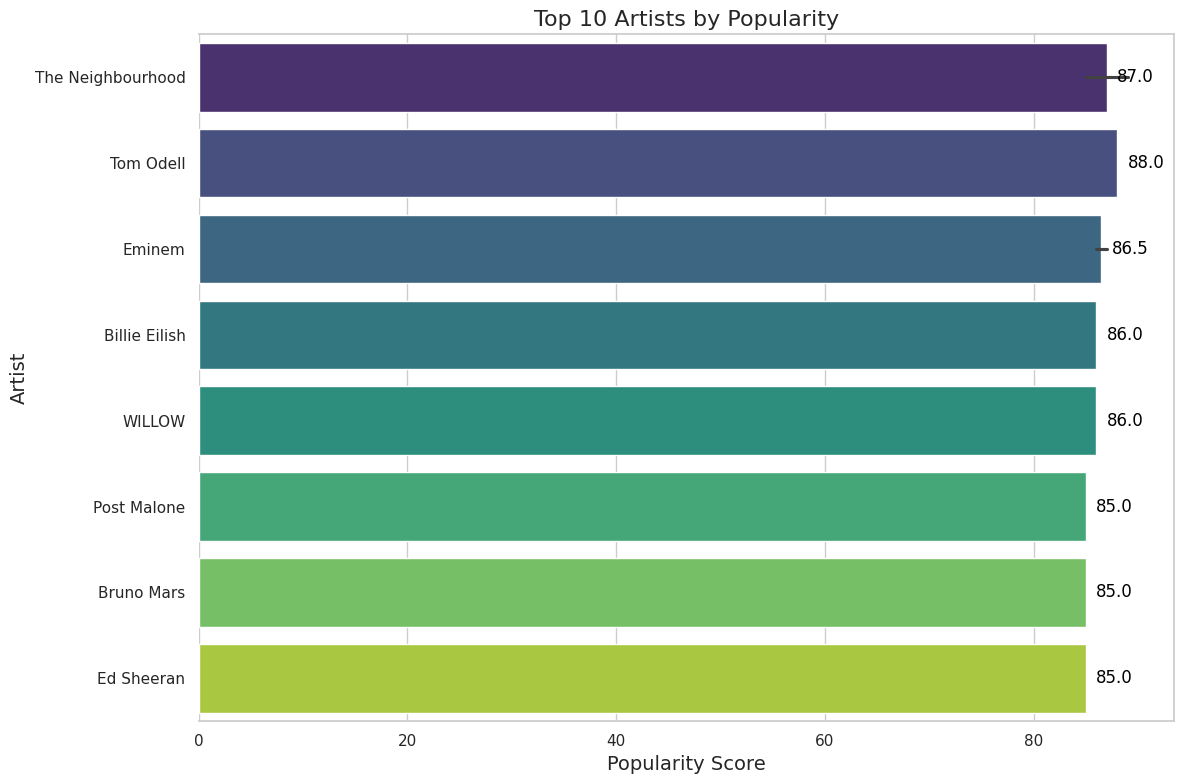

In [86]:
# Mengurutkan dan mengambil 10 artis teratas berdasarkan popularitas
top_artists_popularity = df.sort_values(by='popularity', ascending=False).head(10)

# Membuat ukuran figure yang lebih besar
plt.figure(figsize=(12, 8))

# Membuat grafik bar dengan palet warna 'viridis'
plot = sns.barplot(x='popularity', y='artist', palette='viridis', data=top_artists_popularity)

# Menonaktifkan garis sumbu y
plot.spines['left'].set_visible(False)

# Mengatur label sumbu
plt.xlabel('Popularity Score', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.title('Top 10 Artists by Popularity', fontsize=16)

# Menambahkan nilai pada setiap bar
for i in plot.patches:
    plot.text(i.get_width() + 1, i.get_y() + i.get_height()/2,
              str(round(i.get_width(), 2)),
              fontsize=12, color='black', ha='left', va='center')

# Menampilkan plot dengan layout yang lebih baik
plt.tight_layout()
plt.show()

### Bivariate Analysis

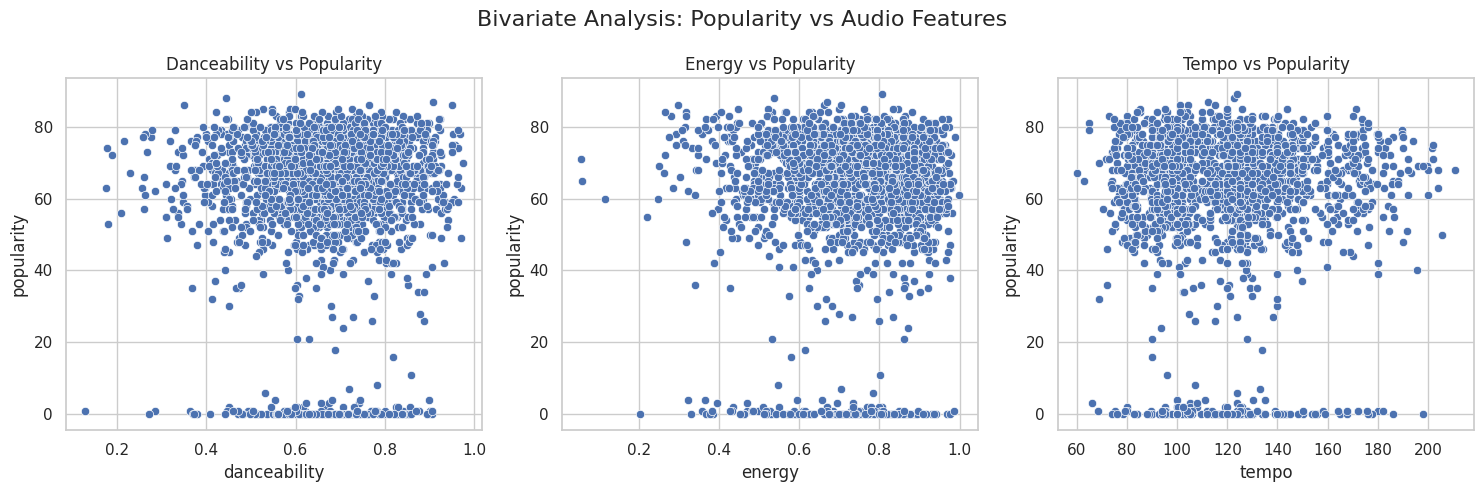

In [108]:
sns.set(style="whitegrid")

# Analisis Bivariate: Korelasi antara popularitas dengan danceability, energy, dan tempo
plt.figure(figsize=(15, 5))

# Scatter plot Popularity vs Danceability
plt.subplot(1, 3, 1)
sns.scatterplot(x='danceability', y='popularity', data=df)
plt.title('Danceability vs Popularity')

# Scatter plot Popularity vs Energy
plt.subplot(1, 3, 2)
sns.scatterplot(x='energy', y='popularity', data=df)
plt.title('Energy vs Popularity')

# Scatter plot Popularity vs Tempo
plt.subplot(1, 3, 3)
sns.scatterplot(x='tempo', y='popularity', data=df)
plt.title('Tempo vs Popularity')

plt.suptitle('Bivariate Analysis: Popularity vs Audio Features', size=16)
plt.tight_layout()
plt.show()

### Multivariate Analysis

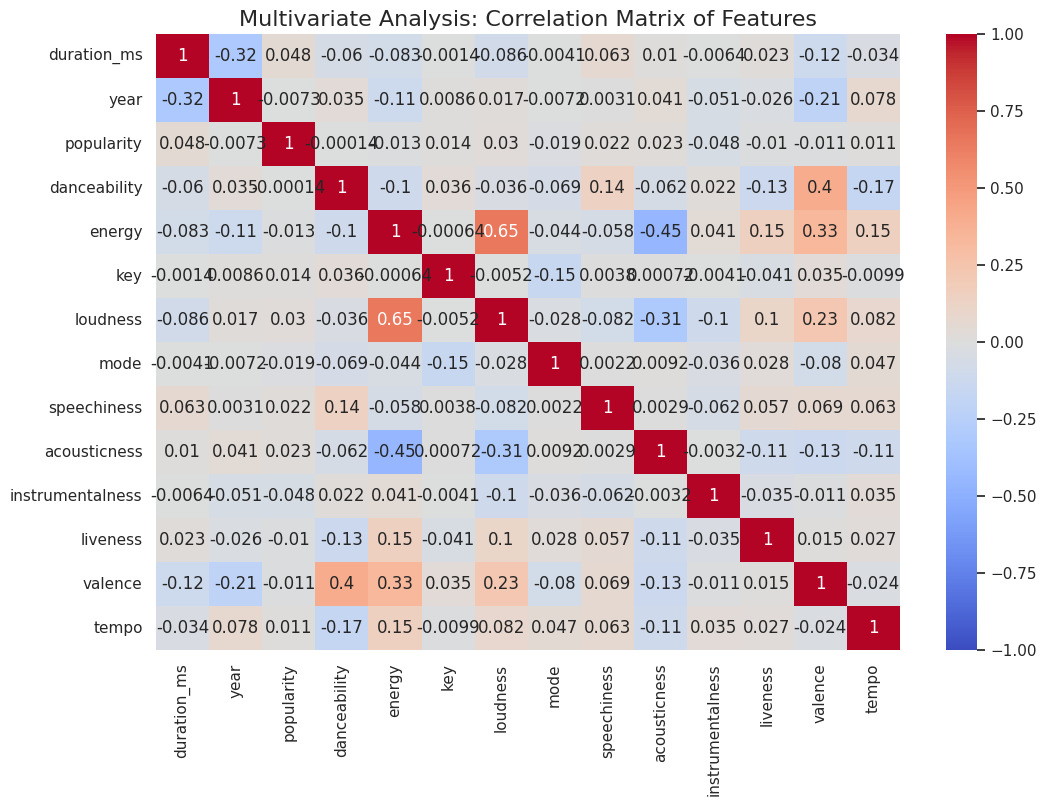

In [88]:
# Analisis Multivariate: Korelasi matriks
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()  # Calculate correlation on numeric data only
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Multivariate Analysis: Correlation Matrix of Features', size=16)
plt.show()

## D. Data Preparation
Data preparation sangat penting dalam pengembangan model machine learning, karena proses ini mencakup transformasi data yang diperlukan agar pemodelan dapat berlangsung dengan optimal.

Dalam dataset ini, terdapat sejumlah variabel yang akan dipakai untuk membangun model machine learning, di antaranya adalah artist, song, year, popularity, danceability, energy, speechiness, acousticness, instrumentalness, valence, tempo, dan genre. Dengan demikian, fitur-fitur lain yang tidak relevan untuk proyek ini akan dihapus atau di-drop.

In [89]:
# delete unessesary features from dataset
features_to_drop = ['duration_ms', 'explicit', 'key', 'loudness', 'mode']
df.drop(features_to_drop, axis=1, inplace=True)

df.head()

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,2000,77,0.751,0.834,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,1999,79,0.434,0.897,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,1999,66,0.529,0.496,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,2000,78,0.551,0.913,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,2000,65,0.614,0.928,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Untuk memahami seberapa bervariasi data dalam setiap fitur, kita bisa memeriksa jumlah entri unik yang dimiliki oleh masing-masing fitur. Hal ini penting dilakukan karena memberikan gambaran mengenai distribusi data dan membantu dalam proses analisis lebih lanjut. Langkah-langkah untuk menghitung jumlah entri unik pada setiap fitur dapat dilakukan dengan cara berikut.

In [90]:
print('Jumlah entri unik pada setiap fitur:')
for column in df.columns:
    unique_count = df[column].nunique()
    print(f'Kolom {column}: {unique_count}')

Jumlah entri unik pada setiap fitur:
Kolom artist: 835
Kolom song: 1879
Kolom year: 23
Kolom popularity: 76
Kolom danceability: 565
Kolom energy: 580
Kolom speechiness: 837
Kolom acousticness: 1208
Kolom instrumentalness: 772
Kolom liveness: 783
Kolom valence: 760
Kolom tempo: 1831
Kolom genre: 59


In [91]:
# Menampilkan nilai unik dari kolom 'year' dengan mengurutkannya
unique_year = df['year'].unique()
unique_year.sort()
unique_year

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

Musik yang terdapat data dataset antara tahun **1998 - 2020**

In [92]:
# Menampilkan nilai unik dari kolom 'popularity' dengan mengurutkannya
unique_popularity = df['popularity'].unique()
unique_popularity.sort()
unique_popularity

array([ 0,  1,  2,  3,  4,  6,  7,  8, 11, 16, 17, 18, 21, 24, 26, 27, 28,
       30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89])

Popularity tersebar dari yang paling rendah yaitu 0 hingga paling tinggi yaitu 89

In [93]:
# Menampilkan nilai unik dari kolom 'genre'
unique_genre = df['genre'].unique()
unique_genre.sort()
unique_genre

array(['Dance/Electronic', 'Folk/Acoustic, pop', 'Folk/Acoustic, rock',
       'Folk/Acoustic, rock, pop', 'R&B',
       'World/Traditional, Folk/Acoustic', 'World/Traditional, hip hop',
       'World/Traditional, pop', 'World/Traditional, pop, Folk/Acoustic',
       'World/Traditional, rock', 'World/Traditional, rock, pop',
       'country', 'country, latin', 'easy listening', 'hip hop',
       'hip hop, Dance/Electronic', 'hip hop, R&B', 'hip hop, country',
       'hip hop, latin, Dance/Electronic', 'hip hop, pop',
       'hip hop, pop, Dance/Electronic', 'hip hop, pop, R&B',
       'hip hop, pop, R&B, Dance/Electronic', 'hip hop, pop, R&B, latin',
       'hip hop, pop, country', 'hip hop, pop, latin',
       'hip hop, pop, rock', 'hip hop, rock, pop', 'latin', 'metal',
       'pop', 'pop, Dance/Electronic', 'pop, Folk/Acoustic', 'pop, R&B',
       'pop, R&B, Dance/Electronic', 'pop, R&B, easy listening',
       'pop, country', 'pop, easy listening, Dance/Electronic',
       'pop, ea

Jika diperhatikan, terdapat beberapa entri lagu yang memiliki lebih dari satu genre, dan genre tersebut muncul berulang kali. Kondisi ini dapat memengaruhi kinerja model, sehingga perlu adanya penanganan khusus untuk mengatasi masalah tersebut. Sebagai contoh, terdapat entri dengan genre "rock, pop" atau "rock, metal". <br>
Dalam proyek ini, data yang akan digunakan hanya akan mengambil genre pertama pada entri yang memiliki lebih dari satu genre. Pendekatan ini bertujuan untuk menyederhanakan representasi genre dan mencegah kompleksitas berlebih dalam model.

In [94]:
# Memperbaiki kode untuk menangani kasus genre dengan tanda '/'
df['genre'] = df[~(df.genre.isna())]['genre'].apply(lambda x: x.split(',')[0] if x.split(',')[0] != "Hip Hop" else "Hip Hop" if '/' not in x else x)

In [95]:
print(df['genre'].value_counts())

genre
pop                  912
hip hop              749
rock                 155
Dance/Electronic      41
set()                 22
latin                 15
R&B                   13
World/Traditional     10
country               10
metal                  9
Folk/Acoustic          4
easy listening         1
Name: count, dtype: int64


Berdasarkan analisis yang telah dilakukan, ditemukan genre dengan nama set(). Karena saat ini tidak memungkinkan untuk mengidentifikasi genre dari musik tersebut, langkah sementara yang akan diambil adalah menghapus data tersebut dari dataset. Hal ini dilakukan untuk menjaga konsistensi dan kualitas data yang digunakan dalam model, hingga solusi yang lebih tepat dapat diterapkan di masa mendatang.

In [96]:
# Menghapus data dengan genre "set()"
df = df[df['genre'] != 'set()']
df.head()

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,2000,77,0.751,0.834,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,1999,79,0.434,0.897,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock
2,Faith Hill,Breathe,1999,66,0.529,0.496,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop
3,Bon Jovi,It's My Life,2000,78,0.551,0.913,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock
4,*NSYNC,Bye Bye Bye,2000,65,0.614,0.928,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## E. Content Based Filtering Model

### Indentifikasi Representasi Feature

In [97]:
data = df
data.head()

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,2000,77,0.751,0.834,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,1999,79,0.434,0.897,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock
2,Faith Hill,Breathe,1999,66,0.529,0.496,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop
3,Bon Jovi,It's My Life,2000,78,0.551,0.913,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock
4,*NSYNC,Bye Bye Bye,2000,65,0.614,0.928,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [98]:
# Insialisasi
tf = TfidfVectorizer()

# Perhitungan idf pada data genre
tf.fit(data['genre'])

# Mapping array feature index int ke feature utama
tf.get_feature_names_out()

array(['acoustic', 'country', 'dance', 'easy', 'electronic', 'folk',
       'hip', 'hop', 'latin', 'listening', 'metal', 'pop', 'rock',
       'traditional', 'world'], dtype=object)

In [99]:
# transform ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# output
tfidf_matrix.shape

(1919, 15)

In [100]:
# Mengubah vektor tf-idf dalam bentuk matrix
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.song
).sample(10, axis=1).sample(10, axis=0)

,traditional,electronic,dance,hop,hip,folk,rock,metal,country,listening
song,,,,,,,,,,
"Slow Down - 12"" Version",0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0
EARFQUAKE,0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0
Years - ラジオ・エディット,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Club Can't Handle Me (feat. David Guetta),0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0
Turn Me On,0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0
Like Toy Soldiers,0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0
Boasty (feat. Idris Elba),0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0
How You Remind Me,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
Swalla (feat. Nicki Minaj & Ty Dolla $ign),0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [102]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

Pada tahap ini, dilakukan perhitungan cosine similarity menggunakan dataframe `tfidf_matrix` yang sudah dihasilkan pada tahap sebelumnya. Dengan hanya satu baris kode untuk memanggil fungsi cosine similarity dari library `sklearn`, perhitungan kesamaan antar lagu berhasil dilakukan. Hasil dari perhitungan ini adalah sebuah matriks kesamaan yang disajikan dalam bentuk array.

Langkah selanjutnya adalah melihat hasil matriks kesamaan antar lagu. Untuk itu, ditampilkan sampel data dari matriks tersebut dengan mengambil 5 sampel kolom (axis = 1) yang merepresentasikan judul lagu, serta 10 sampel baris (axis = 0) untuk melihat perbandingan kesamaan antar beberapa lagu.








In [103]:
# merancang dataframe dari var cosine_sim dengna baris dan kolom judul lagu
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['song'], columns=data['song'])
print('Shape:', cosine_sim_df.shape)

# menampilkan similarity matrix pada tiap lagu
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1919, 1919)


song,Sweater Weather,Every Teardrop Is a Waterfall,See You Again (feat. Charlie Puth),One Kiss (with Dua Lipa),If Tomorrow Never Comes
song,,,,,
I'm In Control,0.0,0.0,0.0,0.0,1.0
How You Gonna Act Like That,0.0,0.0,1.0,1.0,0.0
Slow Jamz,0.0,0.0,1.0,1.0,0.0
We Don't Talk Anymore (feat. Selena Gomez),0.0,0.0,0.0,0.0,1.0
Runaway Love,0.0,0.0,1.0,1.0,0.0
Animal,1.0,1.0,0.0,0.0,0.0
FRIENDS,0.0,0.0,0.0,0.0,1.0
Sonnentanz - Sun Don't Shine,0.0,0.0,0.0,0.0,1.0
Smack That,0.0,0.0,0.0,0.0,1.0


Berdasarkan cosine similarity di atas, dapat diidentifikasi tingkat kesamaan antar lagu. Matriks dengan ukuran (1919, 1919) merepresentasikan ukuran similarity matrix dari data yang digunakan. Artinya, matriks ini menunjukkan kesamaan antara 1919 lagu, baik pada sumbu X (horizontal) maupun Y (vertikal). Dengan kata lain, telah dilakukan penghitungan kesamaan antar 1919 lagu.

Namun, karena tidak mungkin menampilkan semua hasil dalam satu waktu, hanya 10 lagu di sumbu vertikal dan 5 lagu di sumbu horizontal yang ditampilkan untuk representasi sederhana.

Jika diperhatikan, kesamaan antara lagu di sumbu X dan Y bisa diidentifikasi. Sebagai contoh, lagu **"If You Come Back"** pada sumbu X terdeteksi memiliki kesamaan dengan lagu **"Milkshake"** pada sumbu Y yang menunjukkan bahwa kedua lagu tersebut memiliki karakteristik yang mirip menurut penghitungan cosine similarity.

### Top-N Recommendation

In [104]:
def recommend_song(song_title, similarity_data=cosine_sim_df, items=data[['song', 'genre']], k=5):
    """
    Rekomendasi lagu berdasarkan kemiripan dataframe

    Parameter:
    ---
    song_title : tipe data string (str)
                Nama lagu (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan lagu sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,song_title].to_numpy().argpartition(
        range(-1, -k, -1))
    # Mengambil similarity terbesar dai index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    # Drop nama lagu yang dicari
    closest = closest.drop(song_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Pada kode di atas, digunakan fungsi `argpartition` untuk mengambil sejumlah nilai tertinggi (k) dari data similarity, yaitu dalam hal ini dari dataframe `cosine_sim_df`. Argpartition membantu mengidentifikasi k nilai kesamaan tertinggi dari data yang tersedia. Setelah itu, data dengan bobot atau tingkat kesamaan tertinggi hingga terendah diurutkan dan disimpan ke dalam variabel `closest`.

Langkah berikutnya adalah menghapus lagu yang sedang dicari, agar lagu tersebut tidak muncul dalam daftar rekomendasi. Dalam contoh ini, kita mencari lagu yang mirip dengan lagu "Excuse Me Miss" oleh Taylor Swift. Dengan demikian, setelah proses pengurutan, rekomendasi lagu yang mirip dengan "Excuse Me Miss" akan muncul, kecuali "Excuse Me Miss" itu sendiri.

In [115]:
# Menampilkan daftar lagu dengan artis yang diinginkan
based_songs = df[df['artist'] == 'JAY-Z'].head()
based_songs

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
37,JAY-Z,Big Pimpin',1999,69,0.880,0.814,0.140,0.1680,0.006720,0.0584,0.942,138.083,hip hop
54,JAY-Z,I Just Wanna Love U (Give It 2 Me),2000,59,0.800,0.922,0.240,0.3010,0.000009,0.0352,0.801,98.631,hip hop
191,JAY-Z,Izzo (H.O.V.A.),2001,63,0.618,0.844,0.342,0.0178,0.000126,0.0634,0.697,84.411,hip hop
313,JAY-Z,03' Bonnie & Clyde,2002,71,0.759,0.678,0.314,0.2300,0.000000,0.1500,0.327,89.640,hip hop
373,JAY-Z,Excuse Me Miss,2002,56,0.714,0.862,0.286,0.0305,0.000000,0.0884,0.887,92.849,hip hop


In [116]:
data[data.song.eq('Excuse Me Miss')]

,artist,song,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
373,JAY-Z,Excuse Me Miss,2002,56,0.714,0.862,0.286,0.0305,0.0,0.0884,0.887,92.849,hip hop


In [117]:
# Mendapatkan rekomendasi lagu yang mirip dengan lagu Taylor Swift - Love Story
recommend_song('Excuse Me Miss')

,song,genre
0,Circles,hip hop
1,Titanium (feat. Sia),hip hop
2,Slow Jamz,hip hop
3,Lost,hip hop
4,My Place,hip hop
